# Taxi demand prediction in New York City


## Bussiness Problem:

For a given location in New York City, our goal is to predict the number of pickups in that given location. Some location require more taxis at a particular time than other locations owing to the presence schools, hospitals, offices etc. The prediction result can be transferred to the taxi drivers via Smartphone app, and they can subsequently move to the locations where predicted pickups are high.

## 1.Data Information

<p>
Ge the data from : http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml (2016 data)
The data used in the attached datasets were collected and provided to the NYC Taxi and Limousine Commission (TLC) 
</p>

## Information on taxis:

<h5> Yellow Taxi: Yellow Medallion Taxicabs</h5>
<p> These are the famous NYC yellow taxis that provide transportation exclusively through street-hails. The number of taxicabs is limited by a finite number of medallions issued by the TLC. You access this mode of transportation by standing in the street and hailing an available taxi with your hand. The pickups are not pre-arranged.</p>

<h5> For Hire Vehicles (FHVs) </h5>
<p> FHV transportation is accessed by a pre-arrangement with a dispatcher or limo company. These FHVs are not permitted to pick up passengers via street hails, as those rides are not considered pre-arranged. </p>

<h5> Green Taxi: Street Hail Livery (SHL) </h5>
<p>  The SHL program will allow livery vehicle owners to license and outfit their vehicles with green borough taxi branding, meters, credit card machines, and ultimately the right to accept street hails in addition to pre-arranged rides. </p>
<p> Credits: Quora</p>

<h5>Footnote:</h5>
In the given notebook we are considering only the yellow taxis for the time period between Jan - Mar 2015 & Jan - Mar 2016

## Import required libraries

In [6]:
#Importing Libraries
# pip3 install graphviz
#pip3 install dask
#pip3 install toolz
#pip3 install cloudpickle
# https://www.youtube.com/watch?v=ieW3G7ZzRZ0
# https://github.com/dask/dask-tutorial
# please do go through this python notebook: https://github.com/dask/dask-tutorial/blob/master/07_dataframe.ipynb
import dask.dataframe as dd#similar to pandas

import pandas as pd#pandas to create small dataframes 

# pip3 install foliun
# if this doesnt work refere install_folium.JPG in drive
import folium #open street map

# unix time: https://www.unixtimestamp.com/
import datetime #Convert to unix time

import time #Convert to unix time

# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays

# matplotlib: used to plot graphs
import matplotlib
# matplotlib.use('nbagg') : matplotlib uses this protocall which makes plots more user intractive like zoom in and zoom out
matplotlib.use('nbagg')
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  

import scipy
import math
# this lib is used while we calculate the stight line distance between two (lat,lon) pairs in miles
import gpxpy.geo #Get the haversine distance

from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os

# download migwin: https://mingw-w64.org/doku.php/download/mingw-builds
# install it in your system and keep the path, migw_path ='installed path'
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-5.3.0-posix-seh-rt_v4-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

# to install xgboost: pip3 install xgboost
# if it didnt happen check install_xgboost.JPG
import xgboost as xgb

# to install sklearn: pip install -U scikit-learn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Store current state of object:

In [7]:
import pickle
#Functions to save objects for later use and retireve it
def savetofile(obj,filename):
    pickle.dump(obj,open(filename+".pkl","wb"))
def openfromfile(filename):
    temp = pickle.load(open(filename+".pkl","rb"))
    return temp


## 2.Data Collection
We Have collected all yellow taxi trips data from jan-2015 to dec-2016(Will be using only 2015 data)
<table>
<tr>
<th> file name </th>
<th> file name size</th>
<th> number of records </th>
<th> number of features </th>
</tr>
<tr>
<td> yellow_tripdata_2016-01 </td>
<td> 1. 59G </td>
<td> 10906858 </td>
<td> 19 </td>
</tr>

<tr>
<td> yellow_tripdata_2016-02 </td>
<td> 1. 66G </td>
<td> 11382049 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2016-03 </td>
<td> 1. 78G </td>
<td> 12210952 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2016-04 </td>
<td> 1. 74G </td>
<td> 11934338 </td>
<td> 19 </td>
</tr>

<tr>
<td> yellow_tripdata_2016-05 </td>
<td> 1. 73G </td>
<td> 11836853 </td>
<td> 19 </td>
</tr>

<tr>
<td> yellow_tripdata_2016-06 </td>
<td> 1. 62G </td>
<td> 11135470 </td>
<td> 19 </td>
</tr>

<tr>
<td> yellow_tripdata_2016-07 </td>
<td> 884Mb </td>
<td> 10294080 </td>
<td> 17 </td>
</tr>

<tr>
<td> yellow_tripdata_2016-08 </td>
<td> 854Mb </td>
<td> 9942263 </td>
<td> 17 </td>
</tr>

<tr>
<td> yellow_tripdata_2016-09 </td>
<td> 870Mb </td>
<td> 10116018 </td>
<td> 17 </td>
</tr>

<tr>
<td> yellow_tripdata_2016-10 </td>
<td> 933Mb </td>
<td> 10854626 </td>
<td> 17 </td>
</tr>
<tr>
<td> yellow_tripdata_2016-11 </td>
<td> 868Mb </td>
<td> 10102128 </td>
<td> 17 </td>
</tr>
<tr>
<td> yellow_tripdata_2016-12 </td>
<td> 897Mb </td>
<td> 10449408 </td>
<td> 17 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-01 </td>
<td> 1.84Gb </td>
<td> 12748986 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-02 </td>
<td> 1.81Gb </td>
<td> 12450521 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-03 </td>
<td> 1.94Gb </td>
<td> 13351609 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-04 </td>
<td> 1.90Gb </td>
<td> 13071789 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-05 </td>
<td> 1.91Gb </td>
<td> 13158262 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-06 </td>
<td> 1.79Gb </td>
<td> 12324935 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-07 </td>
<td> 1.68Gb </td>
<td> 11562783 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-08 </td>
<td> 1.62Gb </td>
<td> 11130304 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-09 </td>
<td> 1.63Gb </td>
<td> 11225063 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-10 </td>
<td> 1.79Gb </td>
<td> 12315488 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-11 </td>
<td> 1.65Gb </td>
<td> 11312676 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-12 </td>
<td> 1.67Gb </td>
<td> 11460573 </td>
<td> 19 </td>
</tr>
</table>

In [8]:
#Looking at the features
# dask dataframe  : # https://github.com/dask/dask-tutorial/blob/master/07_dataframe.ipynb
month = dd.read_csv('yellow_tripdata_2015-01.csv')
print(month.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RateCodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')


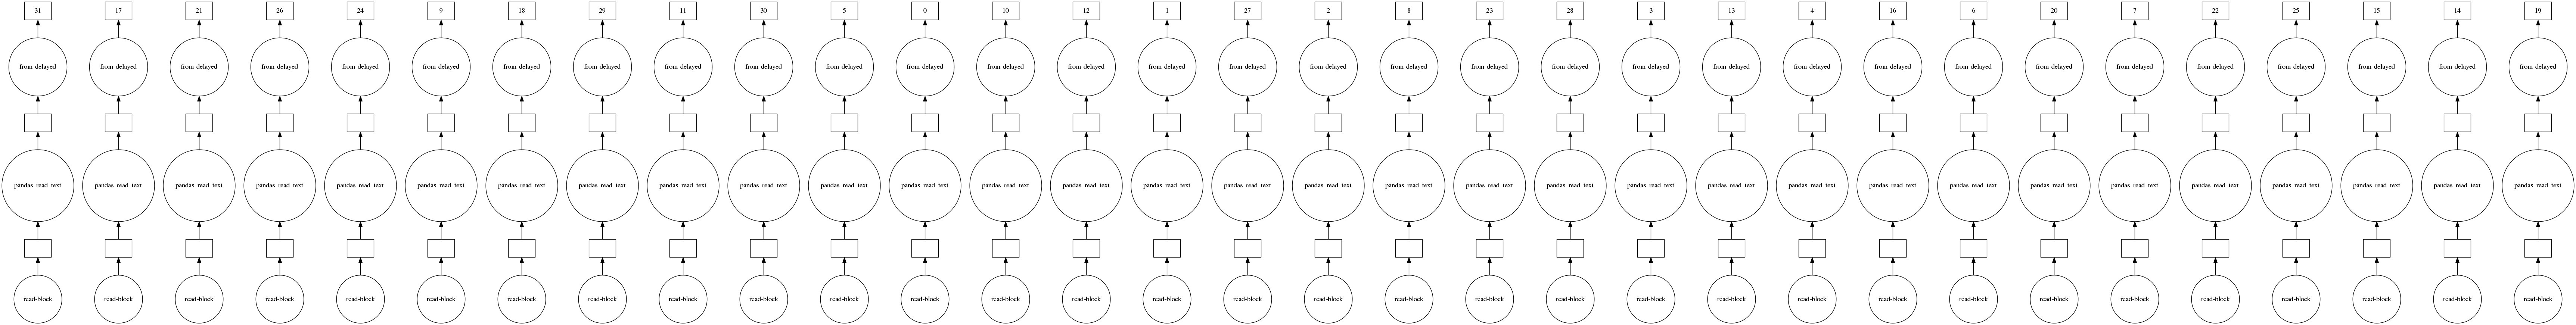

In [9]:
# However unlike Pandas, operations on dask.dataframes don't trigger immediate computation, 
# instead they add key-value pairs to an underlying Dask graph. Recall that in the diagram below, 
# circles are operations and rectangles are results.

# to see the visulaization you need to install graphviz
# pip3 install graphviz if this doesnt work please check the install_graphviz.jpg in the drive
month.visualize()

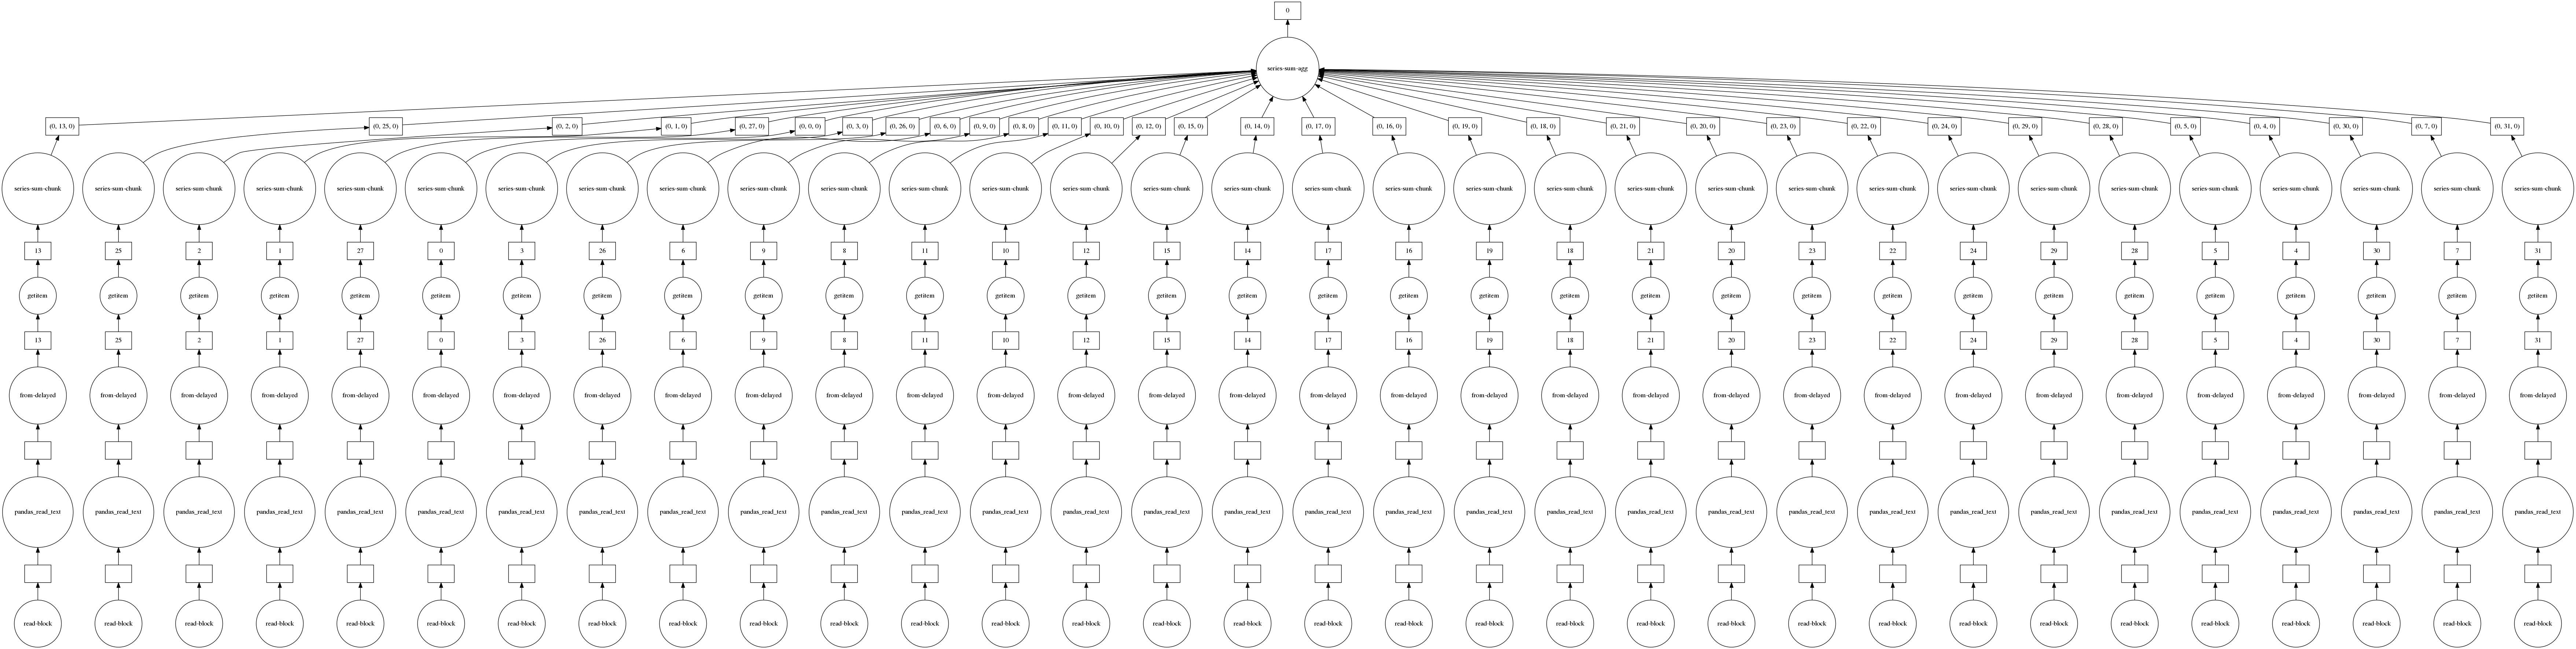

In [10]:
month.fare_amount.sum().visualize()

## Features in the dataset:
<table border="1">
	<tr>
		<th>Field Name</th>
		<th>Description</th>
	</tr>
	<tr>
		<td>VendorID</td>
		<td>
		A code indicating the TPEP provider that provided the record.
		<ol>
			<li>Creative Mobile Technologies</li>
			<li>VeriFone Inc.</li>
		</ol>
		</td>
	</tr>
	<tr>
		<td>tpep_pickup_datetime</td>
		<td>The date and time when the meter was engaged.</td>
	</tr>
	<tr>
		<td>tpep_dropoff_datetime</td>
		<td>The date and time when the meter was disengaged.</td>
	</tr>
	<tr>
		<td>Passenger_count</td>
		<td>The number of passengers in the vehicle. This is a driver-entered value.</td>
	</tr>
	<tr>
		<td>Trip_distance</td>
		<td>The elapsed trip distance in miles reported by the taximeter.</td>
	</tr>
	<tr>
		<td>Pickup_longitude</td>
		<td>Longitude where the meter was engaged.</td>
	</tr>
	<tr>
		<td>Pickup_latitude</td>
		<td>Latitude where the meter was engaged.</td>
	</tr>
	<tr>
		<td>RateCodeID</td>
		<td>The final rate code in effect at the end of the trip.
		<ol>
			<li> Standard rate </li>
			<li> JFK </li>
			<li> Newark </li>
			<li> Nassau or Westchester</li>
			<li> Negotiated fare </li>
			<li> Group ride</li>
		</ol>
		</td>
	</tr>
	<tr>
	<tr>
		<td>Dropoff_longitude</td>
		<td>Longitude where the meter was disengaged.</td>
	</tr>
	<tr>
		<td>Dropoff_ latitude</td>
		<td>Latitude where the meter was disengaged.</td>
	</tr>
	<tr>
		<td>Payment_type</td>
		<td>A numeric code signifying how the passenger paid for the trip.
		<ol>
			<li> Credit card </li>
			<li> Cash </li>
			<li> No charge </li>
			<li> Dispute</li>
			<li> Unknown </li>
			<li> Voided trip</li>
		</ol>
		</td>
	</tr>
	<tr>
		<td>Fare_amount</td>
		<td>The time-and-distance fare calculated by the meter.</td>
	</tr>
	<tr>
		<td>Extra</td>
		<td>Miscellaneous extras and surcharges. Currently, this only includes. the $0.50 and $1 rush hour and overnight charges.</td>
	</tr>
	<tr>
		<td>MTA_tax</td>
		<td>0.50 MTA tax that is automatically triggered based on the metered rate in use.</td>
	</tr>
	<tr>
		<td>Improvement_surcharge</td>
		<td>0.30 improvement surcharge assessed trips at the flag drop. the improvement surcharge began being levied in 2015.</td>
	</tr>
	<tr>
		<td>Tip_amount</td>
		<td>Tip amount – This field is automatically populated for credit card tips.Cash tips are not included.</td>
	</tr>
	<tr>
		<td>Tolls_amount</td>
		<td>Total amount of all tolls paid in trip.</td>
	</tr>
	<tr>
		<td>Total_amount</td>
		<td>The total amount charged to passengers. Does not include cash tips.</td>
	</tr>
</table>

# ML Problem Formulation
<p><b> Time-series forecasting and Regression</b></p>
<br>
-<i> To find number of pickups, given location cordinates(latitude and longitude) and time, in the query reigion and surrounding regions.</i>
<p> 
To solve the above we would be using data collected in Jan - Mar 2015 to predict the pickups in Jan - Mar 2016.
</p>

# Performance metrics
1. Mean Absolute percentage error.
2. Mean Squared error.

## Data Cleaning

In this section we will be doing univariate analysis and removing outlier/illegitimate values which may be caused due to some error

In [11]:
#table below shows few datapoints along with all our features
month.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,-73.993896,40.750111,1,N,-73.974785,40.750618,1,12.0,1.0,0.5,3.25,0.0,0.3,17.05
1,1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,-74.001648,40.724243,1,N,-73.994415,40.759109,1,14.5,0.5,0.5,2.00,0.0,0.3,17.80
2,1,2015-01-10 20:33:38,2015-01-10 20:43:41,1,1.80,-73.963341,40.802788,1,N,-73.951820,40.824413,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80
3,1,2015-01-10 20:33:39,2015-01-10 20:35:31,1,0.50,-74.009087,40.713818,1,N,-74.004326,40.719986,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80
4,1,2015-01-10 20:33:39,2015-01-10 20:52:58,1,3.00,-73.971176,40.762428,1,N,-74.004181,40.742653,2,15.0,0.5,0.5,0.00,0.0,0.3,16.30


## 1. Pickup Latitude and Pickup Longitude

It is inferred from the source https://www.flickr.com/places/info/2459115 that New York is bounded by the location cordinates(lat,long) - (40.5774, -74.15) & (40.9176,-73.7004) so hence any cordinates not within these cordinates are not considered by us as we are only concerned with pickups which originate within New York.

In [12]:
# Plotting pickup cordinates which are outside the bounding box of New-York 
# we will collect all the points outside the bounding box of newyork city to outlier_locations
outlier_locations = month[((month.pickup_longitude <= -74.15) | (month.pickup_latitude <= 40.5774)| \
                   (month.pickup_longitude >= -73.7004) | (month.pickup_latitude >= 40.9176))]

# creating a map with the a base location
# read more about the folium here: http://folium.readthedocs.io/en/latest/quickstart.html

# note: you dont need to remember any of these, you dont need indeepth knowledge on these maps and plots

map_osm = folium.Map(location=[40.734695, -73.990372], tiles='Stamen Toner')

# we will spot only first 100 outliers on the map, plotting all the outliers will take more time
sample_locations = outlier_locations.head(10000)
for i,j in sample_locations.iterrows():
    if int(j['pickup_latitude']) != 0:
        folium.Marker(list((j['pickup_latitude'],j['pickup_longitude']))).add_to(map_osm)
map_osm

<b>Observation:-</b> As you can see above that there are some points just outside the boundary but there are a few that are in either South america, Mexico or Canada

## 2. Dropoff Latitude & Dropoff Longitude

It is inferred from the source https://www.flickr.com/places/info/2459115 that New York is bounded by the location cordinates(lat,long) - (40.5774, -74.15) & (40.9176,-73.7004) so hence any cordinates not within these cordinates are not considered by us as we are only concerned with dropoffs which are within New York.

In [13]:
# Plotting dropoff cordinates which are outside the bounding box of New-York 
# we will collect all the points outside the bounding box of newyork city to outlier_locations
outlier_locations = month[((month.dropoff_longitude <= -74.15) | (month.dropoff_latitude <= 40.5774)| \
                   (month.dropoff_longitude >= -73.7004) | (month.dropoff_latitude >= 40.9176))]

# creating a map with the a base location
# read more about the folium here: http://folium.readthedocs.io/en/latest/quickstart.html

# note: you dont need to remember any of these, you dont need indeepth knowledge on these maps and plots

map_osm = folium.Map(location=[40.734695, -73.990372], tiles='Stamen Toner')

# we will spot only first 100 outliers on the map, plotting all the outliers will take more time
sample_locations = outlier_locations.head(10000)
for i,j in sample_locations.iterrows():
    if int(j['pickup_latitude']) != 0:
        folium.Marker(list((j['dropoff_latitude'],j['dropoff_longitude']))).add_to(map_osm)
map_osm

<b>Observation:-</b> The observations here are similar to those obtained while analysing pickup latitude and longitude

## 3. Trip Durations:

<p style="font-size:18px">According to NYC Taxi &amp; Limousine Commision Regulations <b style= "color:blue">the maximum allowed trip duration in a 24 hour interval is 12 hours.</b> </p>

In [14]:
#The timestamps are converted to unix so as to get duration(trip-time) & speed also pickup-times in unix are used while binning 

# in out data we have time in the formate "YYYY-MM-DD HH:MM:SS" we convert thiss sting to python time formate and then into unix time stamp
# https://stackoverflow.com/a/27914405
def convert_to_unix(s):
    return time.mktime(datetime.datetime.strptime(s, "%Y-%m-%d %H:%M:%S").timetuple())

# we return a data frame which contains the columns
# 1.'passenger_count' : self explanatory
# 2.'trip_distance' : self explanatory
# 3.'pickup_longitude' : self explanatory
# 4.'pickup_latitude' : self explanatory
# 5.'dropoff_longitude' : self explanatory
# 6.'dropoff_latitude' : self explanatory
# 7.'total_amount' : total fair that was paid
# 8.'trip_times' : duration of each trip
# 9.'pickup_times : pickup time converted into unix time 
# 10.'Speed' : velocity of each trip
def return_with_trip_times(month):
    #df.compute() converts dask df to pandas df 
    duration = month[['tpep_pickup_datetime','tpep_dropoff_datetime']].compute()
    #pickups and dropoffs to unix time
    duration_pickup = [convert_to_unix(x) for x in duration['tpep_pickup_datetime'].values]
    duration_drop = [convert_to_unix(x) for x in duration['tpep_dropoff_datetime'].values]
    #calculate duration of trips
    durations = (np.array(duration_drop) - np.array(duration_pickup))/float(60)

    #append durations of trips and speed in miles/hr to a new dataframe
    new_frame = month[['passenger_count','trip_distance','pickup_longitude',\
                       'pickup_latitude','dropoff_longitude','dropoff_latitude','total_amount']].compute()
    
    new_frame['trip_times'] = durations
    new_frame['pickup_times'] = duration_pickup
    new_frame['Speed'] = 60*(new_frame['trip_distance']/new_frame['trip_times'])
    
    return new_frame

# print(frame_with_durations.head())
#  passenger_count	trip_distance	pickup_longitude	pickup_latitude	dropoff_longitude	dropoff_latitude	total_amount	trip_times	pickup_times	Speed
#   1                  1.59	      -73.993896        	40.750111    	-73.974785      	40.750618           	17.05   	 18.050000	1.421329e+09	5.285319
#   1               	3.30    	-74.001648      	40.724243   	-73.994415      	40.759109           	17.80   	19.833333	1.420902e+09	9.983193
#   1               	1.80     	-73.963341      	40.802788     	-73.951820      	40.824413           	10.80   	10.050000	1.420902e+09	10.746269
#   1               	0.50    	-74.009087      	40.713818    	-74.004326       	40.719986           	4.80    	1.866667	1.420902e+09	16.071429
#   1               	3.00    	-73.971176      	40.762428    	-74.004181      	40.742653           	16.30   	19.316667	1.420902e+09	9.318378
frame_with_durations = return_with_trip_times(month)

## 4.Outlier removal:

### Dictionary to save upper and lower bound of outlier for different feature of data:

In [15]:
outlier={}
#outlier['trip_time_ll'], outlier['trip_time_ul'] = 0, 720
#outlier['trip_dist_ll'], outlier['trip_dist_ul'] = 0, 23
#outlier['speed_ll'], outlier['speed_ul'] = 0, 49.44  
#outlier['amount_ll'], outlier['amount_ul'] = 0, 1000
outlier['drop_lat_ll'], outlier['drop_lat_ul']=40.5774, 40.9176
outlier['drop_lon_ll'], outlier['drop_lon_ul']=-74.15, -73.7004    
outlier['pick_lat_ll'], outlier['pick_lat_ul']=40.5774, 40.9176
outlier['pick_lon_ll'], outlier['pick_lon_ul']=-74.15, -73.7004

### Function for box-plot:

In [16]:
def box_plot(data, feature_name):
    '''BOX PLOT OF A FEATURE'''
    plt.figure(1, figsize=(9,7))
    sns.set_style('darkgrid')
    sns.boxplot(y=feature_name, data=data)
    plt.title('BOX-PLOT (%s)'%feature_name)
    plt.show()

### Function for percentile:

In [17]:
def percentile_in_range(data, feature_name, range_):
    '''CALCULATE PERCENTILE '''
    start, end, offset = range_[0], range_[1], range_[2]
    per_to_find = np.arange(start, end+offset, offset)
    percentiles=np.percentile(data[feature_name], per_to_find)
    for per, percentile_value in zip( per_to_find, percentiles):
        print('%.1f percentile value is: %.4f'%( per, percentile_value ))
  

### [4.1] Trip-Duration:

In [18]:
# removing data based on our analysis and TLC regulations
# TLC regulations said that a trip can't be of more than '12 hr = 720 mint'
#ADD UPPER BOUND AND LOWER BOUND FOR TRIP TIME IN DICT OF OUTLIER BOUND
outlier['trip_time_ll'], outlier['trip_time_ul'] = 0, 720
frame_with_durations_modified = frame_with_durations[(frame_with_durations.trip_times>outlier['trip_time_ll']) & \
                                                     (frame_with_durations.trip_times<outlier['trip_time_ul'])]

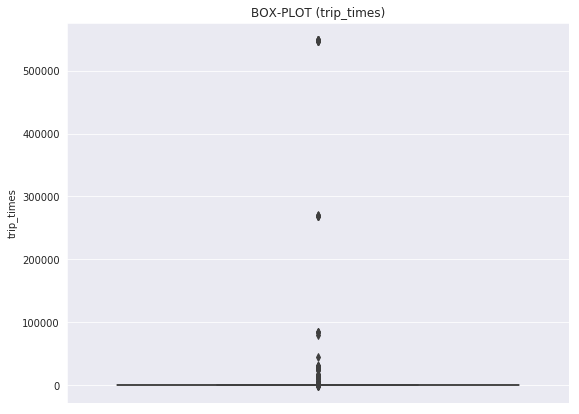

In [19]:
# the skewed box plot shows us the presence of outliers 
box_plot(frame_with_durations ,"trip_times")

In [20]:
#CALCULATING 0 TO 100th PERCENTILE TO FIND A CORRECT PERCENTILE VALUE FOR REMOVAL OF OUTLIERS
percentile_in_range(frame_with_durations, 'trip_times', (0,100,10))

0.0 percentile value is: -1211.0167
10.0 percentile value is: 3.8333
20.0 percentile value is: 5.3833
30.0 percentile value is: 6.8167
40.0 percentile value is: 8.3000
50.0 percentile value is: 9.9500
60.0 percentile value is: 11.8667
70.0 percentile value is: 14.2833
80.0 percentile value is: 17.6333
90.0 percentile value is: 23.4500
100.0 percentile value is: 548555.6333


In [21]:
#LOOKING FURTHER FROM THE 99th PERCENTILE
percentile_in_range(frame_with_durations, 'trip_times', (90,100,1))

90.0 percentile value is: 23.4500
91.0 percentile value is: 24.3500
92.0 percentile value is: 25.3833
93.0 percentile value is: 26.5500
94.0 percentile value is: 27.9333
95.0 percentile value is: 29.5833
96.0 percentile value is: 31.6833
97.0 percentile value is: 34.4667
98.0 percentile value is: 38.7167
99.0 percentile value is: 46.7500
100.0 percentile value is: 548555.6333


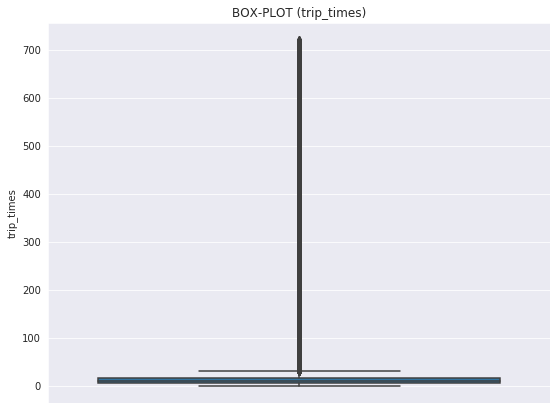

In [22]:
#box-plot after removal of outliers
box_plot(frame_with_durations_modified, "trip_times")

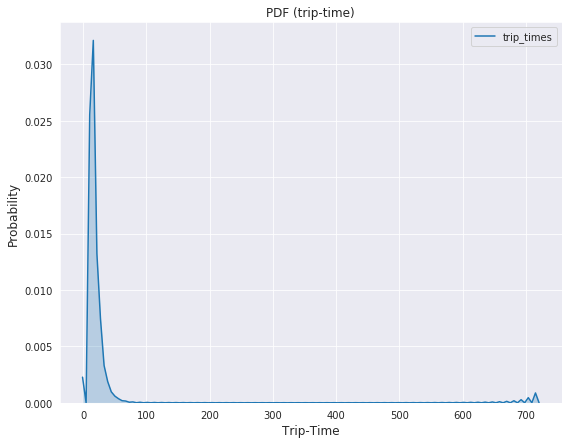

In [23]:
#PDF OF TRIP TIMES AFTER REMOVING THE OUTLIERS
plt.figure(1,figsize=(9,7))
sns.set_style('darkgrid')
sns.kdeplot(data=frame_with_durations_modified['trip_times'], shade=True)
plt.title('PDF (trip-time)',size=12)
plt.ylabel('Probability',fontsize=12)
plt.xlabel('Trip-Time',fontsize=12)
plt.show();

In [24]:
#converting the values to log-values to chec for log-normal
import math
frame_with_durations_modified['log_times']=[math.log(i) for i in frame_with_durations_modified['trip_times'].values]

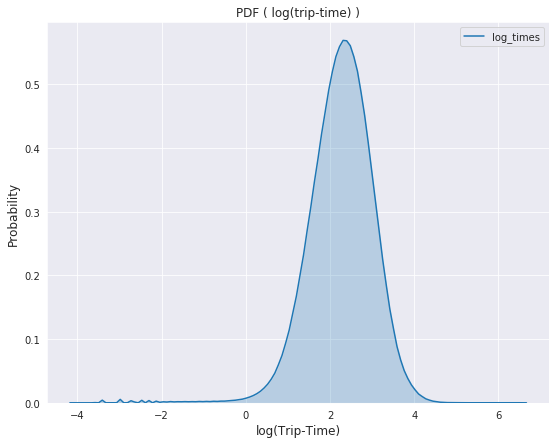

In [25]:
#pdf of log-values
plt.figure(1,figsize=(9,7))
sns.set_style('darkgrid')
sns.kdeplot(data=frame_with_durations_modified['log_times'], shade=True)
plt.title('PDF ( log(trip-time) )',size=12)
plt.ylabel('Probability',fontsize=12)
plt.xlabel('log(Trip-Time)',fontsize=12)
plt.show();

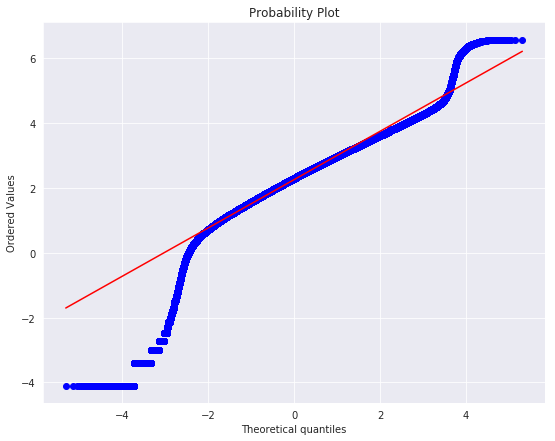

In [26]:
#Q-Q plot for checking if trip-times is log-normal
plt.figure(1,figsize=(9,7))
scipy.stats.probplot(frame_with_durations_modified['log_times'].values, plot=plt)
plt.show()

### Obseravation:
From the above QQ plot we observe that our data is doesnt come from Gaussian distribution.

### [4.2] Speed

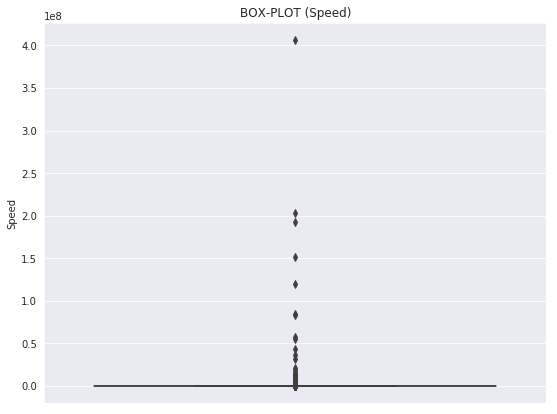

In [27]:
# check for any outliers in the data after trip duration outliers removed
# box-plot for speeds with outliers
frame_with_durations_modified['Speed'] = 60*(frame_with_durations_modified['trip_distance']/frame_with_durations_modified['trip_times'])
box_plot(frame_with_durations_modified, 'Speed')

In [28]:
#calculating speed values at each percntile 0,10,20,30,40,50,60,70,80,90,100 
percentile_in_range(frame_with_durations_modified, 'Speed', (0,100,10))

0.0 percentile value is: 0.0000
10.0 percentile value is: 6.3459
20.0 percentile value is: 7.7712
30.0 percentile value is: 8.9026
40.0 percentile value is: 9.9605
50.0 percentile value is: 11.0526
60.0 percentile value is: 12.2771
70.0 percentile value is: 13.7933
80.0 percentile value is: 15.9735
90.0 percentile value is: 20.2337
100.0 percentile value is: 406256374.2857


In [29]:
#calculating speed values at each percntile 90,91,92,93,94,95,96,97,98,99,100
percentile_in_range(frame_with_durations_modified, 'Speed', (90,100,1))

90.0 percentile value is: 20.2337
91.0 percentile value is: 20.9709
92.0 percentile value is: 21.8182
93.0 percentile value is: 22.7902
94.0 percentile value is: 23.9275
95.0 percentile value is: 25.2772
96.0 percentile value is: 26.9229
97.0 percentile value is: 28.9919
98.0 percentile value is: 31.8115
99.0 percentile value is: 36.1243
100.0 percentile value is: 406256374.2857


In [30]:
#calculating speed values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
percentile_in_range(frame_with_durations_modified, 'Speed', (99,100,.1))

99.0 percentile value is: 36.1243
99.1 percentile value is: 36.7164
99.2 percentile value is: 37.3706
99.3 percentile value is: 38.0937
99.4 percentile value is: 38.9080
99.5 percentile value is: 39.8400
99.6 percentile value is: 40.9553
99.7 percentile value is: 42.3529
99.8 percentile value is: 44.4000
99.9 percentile value is: 49.4445
100.0 percentile value is: 406256372.7701


In [31]:
#removing further outliers based on the 99.9th percentile value
outlier['speed_ll'], outlier['speed_ul'] = 0, 49.44
frame_with_durations_modified=frame_with_durations[(frame_with_durations.Speed>outlier['speed_ll']) &\
                                                   (frame_with_durations.Speed<outlier['speed_ul'])]

In [32]:
#avg.speed of cabs in New-York
print('Avg Speed: %.4f miles/hr'%(sum(frame_with_durations_modified["Speed"]) / float(len(frame_with_durations_modified["Speed"]))))

Avg Speed: 12.4743 miles/hr


<b style='font-size:16px'>The avg speed in Newyork speed is 12.474 miles/hr, so a cab driver can travel <font color='blue'> 2 miles per 10min on avg.</font> </b>

### [4.3] Trip Distance

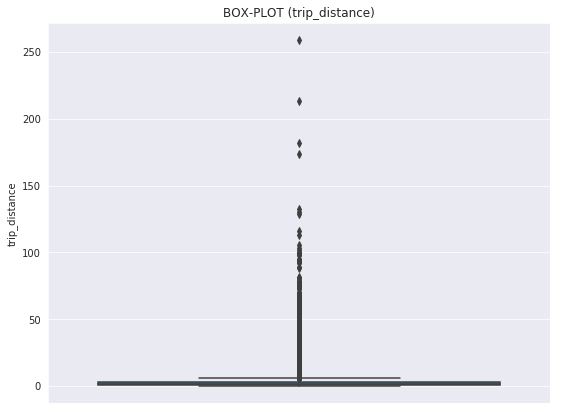

In [33]:
# up to now we have removed the outliers based on trip durations and cab speeds
# lets try if there are any outliers in trip distances
# box-plot showing outliers in trip-distance values
box_plot(frame_with_durations_modified, 'trip_distance')

In [34]:
#calculating trip distance values at each percntile 0,10,20,30,40,50,60,70,80,90,100 
percentile_in_range(frame_with_durations_modified, 'trip_distance', (0,100,10))

0.0 percentile value is: 0.0100
10.0 percentile value is: 0.6600
20.0 percentile value is: 0.9000
30.0 percentile value is: 1.1000
40.0 percentile value is: 1.3900
50.0 percentile value is: 1.7000
60.0 percentile value is: 2.0800
70.0 percentile value is: 2.6000
80.0 percentile value is: 3.6000
90.0 percentile value is: 6.0000
100.0 percentile value is: 258.9000


In [35]:
#calculating trip distance values at each percntile 90,91,92,93,94,95,96,97,98,99,100
percentile_in_range(frame_with_durations_modified, 'trip_distance', (90,100,1))

90.0 percentile value is: 6.0000
91.0 percentile value is: 6.5000
92.0 percentile value is: 7.1000
93.0 percentile value is: 7.9000
94.0 percentile value is: 8.8000
95.0 percentile value is: 9.6600
96.0 percentile value is: 10.6900
97.0 percentile value is: 12.2000
98.0 percentile value is: 16.2000
99.0 percentile value is: 18.2000
100.0 percentile value is: 258.9000


In [36]:
#calculating trip distance values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
percentile_in_range(frame_with_durations_modified, 'trip_distance', (99,100,.1))

99.0 percentile value is: 18.2000
99.1 percentile value is: 18.4000
99.2 percentile value is: 18.6300
99.3 percentile value is: 18.9000
99.4 percentile value is: 19.2000
99.5 percentile value is: 19.5800
99.6 percentile value is: 20.0200
99.7 percentile value is: 20.6000
99.8 percentile value is: 21.3000
99.9 percentile value is: 22.8000
100.0 percentile value is: 258.9000


In [37]:
#removing further outliers based on the 99.9th percentile value
outlier['trip_dist_ll'], outlier['trip_dist_ul'] = 0, 23
frame_with_durations_modified=frame_with_durations[(frame_with_durations.trip_distance>outlier['trip_dist_ll']) &\
                                                   (frame_with_durations.trip_distance<outlier['trip_dist_ul'])]

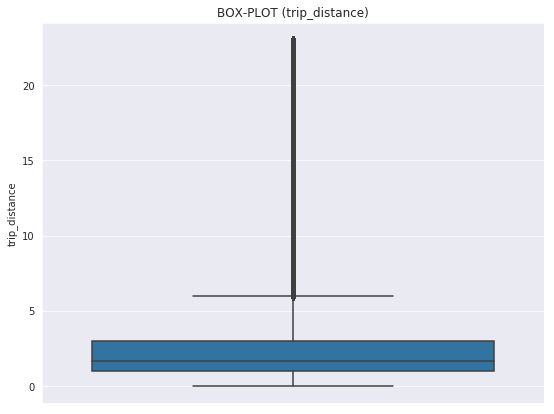

In [38]:
#box-plot after removal of outliers
box_plot(frame_with_durations_modified, 'trip_distance')

### [4.4] Total Fare

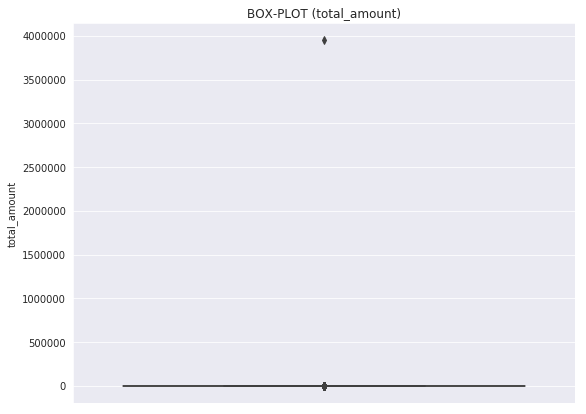

In [39]:
# up to now we have removed the outliers based on trip durations, cab speeds, and trip distances
# lets try if there are any outliers in based on the total_amount
# box-plot showing outliers in fare
box_plot(frame_with_durations_modified, 'total_amount')

In [40]:
#calculating total fare amount values at each percntile 0,10,20,30,40,50,60,70,80,90,100 
percentile_in_range(frame_with_durations_modified, 'total_amount', (0,100,10))

0.0 percentile value is: -242.5500
10.0 percentile value is: 6.3000
20.0 percentile value is: 7.8000
30.0 percentile value is: 8.8000
40.0 percentile value is: 9.8000
50.0 percentile value is: 11.1600
60.0 percentile value is: 12.8000
70.0 percentile value is: 14.8000
80.0 percentile value is: 18.3000
90.0 percentile value is: 25.8000
100.0 percentile value is: 3950611.6000


In [41]:
#calculating total fare amount values at each percntile 90,91,92,93,94,95,96,97,98,99,100
percentile_in_range(frame_with_durations_modified, 'total_amount', (90,100,1))

90.0 percentile value is: 25.8000
91.0 percentile value is: 27.3000
92.0 percentile value is: 29.3000
93.0 percentile value is: 31.8000
94.0 percentile value is: 34.8000
95.0 percentile value is: 38.5300
96.0 percentile value is: 42.6000
97.0 percentile value is: 48.1300
98.0 percentile value is: 58.1300
99.0 percentile value is: 66.1300
100.0 percentile value is: 3950611.6000


In [42]:
#calculating total fare amount values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
percentile_in_range(frame_with_durations_modified, 'total_amount', (99,100,.1))

99.0 percentile value is: 66.1300
99.1 percentile value is: 68.1300
99.2 percentile value is: 69.6000
99.3 percentile value is: 69.6000
99.4 percentile value is: 69.7300
99.5 percentile value is: 69.7500
99.6 percentile value is: 69.7600
99.7 percentile value is: 72.5800
99.8 percentile value is: 75.3500
99.9 percentile value is: 88.2722
100.0 percentile value is: 3950611.5706


<b>Observation:-</b> As even the 99.9th percentile value doesnt look like an outlier,as there is not much difference between the 99.8th percentile and 99.9th percentile, we move on to do graphical analyis

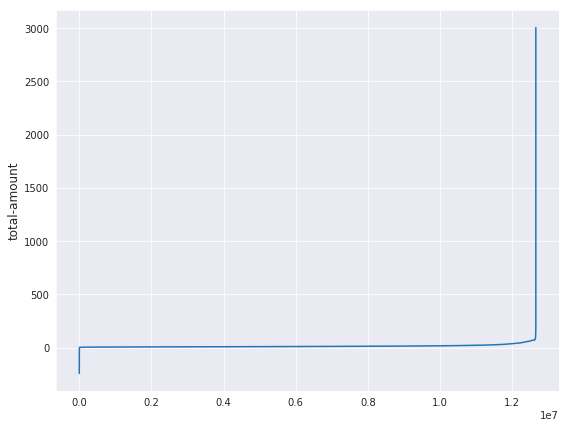

In [43]:
#below plot shows us the fare values(sorted) to find a sharp increase to remove those values as outliers
# plot the fare amount excluding last two values in sorted data
var = frame_with_durations_modified["total_amount"].values
var = np.sort(var,axis = None)
plt.figure(1, figsize=(9,7))
sns.set_style('darkgrid')
plt.plot(var[:-2])
plt.ylabel('total-amount',fontsize=12)
plt.show()

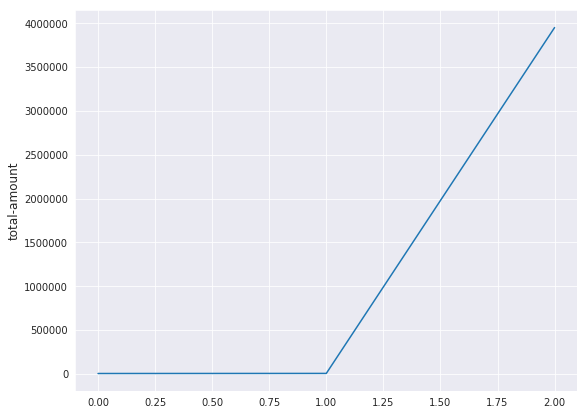

In [44]:
# a very sharp increase in fare values can be seen 
# plotting last three total fare values, and we can observe there is share increase in the values
plt.figure(1, figsize=(9,7))
sns.set_style('darkgrid')
plt.plot(var[-3:])
plt.ylabel('total-amount',fontsize=12)
plt.show()

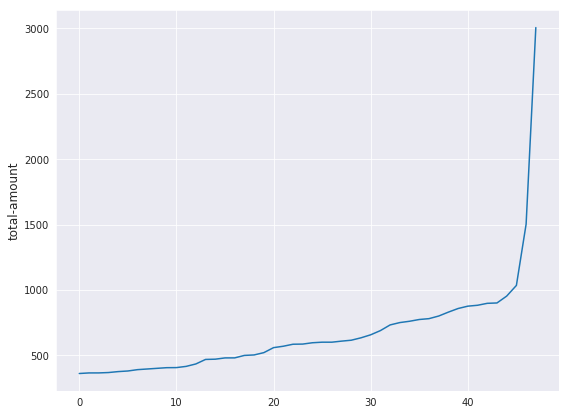

In [45]:
#now looking at values not including the last two points we again find a drastic increase at around 1000 fare value
# we plot last 50 values excluding last two values
plt.figure(1, figsize=(9,7))
sns.set_style('darkgrid')
plt.plot(var[-50:-2])
plt.ylabel('total-amount', fontsize=12)
plt.show()

In [46]:
outlier['amount_ll'], outlier['amount_ul'] = 0, 1000

### [4.5]Remove all outliers/erronous points.

In [47]:
print('range of features to be considered as outlier:\n')
outlier

range of features to be considered as outlier:



{'amount_ll': 0,
 'amount_ul': 1000,
 'drop_lat_ll': 40.5774,
 'drop_lat_ul': 40.9176,
 'drop_lon_ll': -74.15,
 'drop_lon_ul': -73.7004,
 'pick_lat_ll': 40.5774,
 'pick_lat_ul': 40.9176,
 'pick_lon_ll': -74.15,
 'pick_lon_ul': -73.7004,
 'speed_ll': 0,
 'speed_ul': 49.44,
 'trip_dist_ll': 0,
 'trip_dist_ul': 23,
 'trip_time_ll': 0,
 'trip_time_ul': 720}

In [48]:
#removing all outliers based on our univariate analysis above
def remove_outliers(new_frame):
    
    a = new_frame.shape[0]
    print ("Number of pickup records = ",a)
    temp_frame = new_frame[((new_frame.dropoff_longitude >= outlier['drop_lon_ll']) &\
                            (new_frame.dropoff_longitude <= outlier['drop_lon_ul']) &\
                            (new_frame.dropoff_latitude >= outlier['drop_lat_ll']) &\
                            (new_frame.dropoff_latitude <= outlier['drop_lat_ul'])) &\
                           ((new_frame.pickup_longitude >= outlier['pick_lon_ll']) &\
                            (new_frame.pickup_latitude >= outlier['pick_lat_ll'])& \
                            (new_frame.pickup_longitude <= outlier['pick_lon_ul']) &\
                            (new_frame.pickup_latitude <= outlier['pick_lat_ul']))]
    b = temp_frame.shape[0]
    print ("Number of outlier coordinates lying outside NY boundaries:",(a-b))

    
    temp_frame = new_frame[(new_frame.trip_times > outlier['trip_time_ll']) &\
                           (new_frame.trip_times < outlier['trip_time_ul'])]
    c = temp_frame.shape[0]
    print ("Number of outliers from trip times analysis:",(a-c))
    
    
    temp_frame = new_frame[(new_frame.trip_distance > outlier['trip_dist_ll']) &\
                           (new_frame.trip_distance < outlier['trip_dist_ul'])]
    d = temp_frame.shape[0]
    print ("Number of outliers from trip distance analysis:",(a-d))
    
    temp_frame = new_frame[(new_frame.Speed >= outlier['speed_ll']) &\
                           (new_frame.Speed <= outlier['speed_ul'])]
    e = temp_frame.shape[0]
    print ("Number of outliers from speed analysis:",(a-e))
    
    temp_frame = new_frame[(new_frame.total_amount >outlier['amount_ll']) &\
                          (new_frame.total_amount <outlier['amount_ul'])]
    f = temp_frame.shape[0]
    print ("Number of outliers from fare analysis:",(a-f))
    
    
    new_frame = new_frame[((new_frame.dropoff_longitude >= outlier['drop_lon_ll']) &\
                            (new_frame.dropoff_longitude <= outlier['drop_lon_ul']) &\
                            (new_frame.dropoff_latitude >= outlier['drop_lat_ll']) &\
                            (new_frame.dropoff_latitude <= outlier['drop_lat_ul'])) &\
                           ((new_frame.pickup_longitude >= outlier['pick_lon_ll']) &\
                            (new_frame.pickup_latitude >= outlier['pick_lat_ll'])& \
                            (new_frame.pickup_longitude <= outlier['pick_lon_ul']) &\
                            (new_frame.pickup_latitude <= outlier['pick_lat_ul']))]
    
    new_frame = new_frame[(new_frame.trip_times > outlier['trip_time_ll']) &\
                           (new_frame.trip_times < outlier['trip_time_ul'])]
    new_frame = new_frame[(new_frame.trip_distance > outlier['trip_dist_ll']) &\
                           (new_frame.trip_distance < outlier['trip_dist_ul'])]
    new_frame = new_frame[(new_frame.Speed >= outlier['speed_ll']) &\
                           (new_frame.Speed <= outlier['speed_ul'])]
    new_frame = new_frame[(new_frame.total_amount >outlier['amount_ll']) &\
                          (new_frame.total_amount <outlier['amount_ul'])]
    
    print ("Total outliers removed",a - new_frame.shape[0])
    print ("-"*70)
    return new_frame

In [49]:
print ("Removing outliers in the month of Jan-2015")
print ("-"*70)
frame_with_durations_outliers_removed = remove_outliers(frame_with_durations)
percentage_outlier=float(len(frame_with_durations_outliers_removed))/len(frame_with_durations)
print('fraction of data points that remain after removing outliers: %.2f'%(percentage_outlier * 100.0),end='')
print('%')

Removing outliers in the month of Jan-2015
----------------------------------------------------------------------
Number of pickup records =  12748986
Number of outlier coordinates lying outside NY boundaries: 293919
Number of outliers from trip times analysis: 23889
Number of outliers from trip distance analysis: 92597
Number of outliers from speed analysis: 27834
Number of outliers from fare analysis: 5275
Total outliers removed 370841
----------------------------------------------------------------------
fraction of data points that remain after removing outliers: 97.09%


## 5.Data-preperation
### [5.1]Clustering/Segmentation

In [50]:
#trying different cluster sizes to choose the right K in K-means
coords = frame_with_durations_outliers_removed[['pickup_latitude', 'pickup_longitude']].values
neighbours=[]

def find_min_distance(cluster_centers, cluster_len):
    nice_points = 0
    wrong_points = 0
    less2 = []
    more2 = []
    min_dist=1000000 # take any bigger value to find lower bound
    for i in range(0, cluster_len): #take 1 cluster
        nice_points = 0
        wrong_points = 0
        for j in range(0, cluster_len): #ith cluster with all other cluster
            if j!=i:
                # haversine_distance will return distance(in meters) between (lat1,lon1) and (lat2,lon2).
                # 1 km = 1000 meter
                # 1 m = (1 / 1000)km
                # z m = z*(1/1000)km
                # 1 mile= 1.06934 km
                # z km = z*(1/1.06934) miles
                
                distance = gpxpy.geo.haversine_distance(cluster_centers[i][0], cluster_centers[i][1],\
                                                        cluster_centers[j][0], cluster_centers[j][1])
                min_dist = min(min_dist, distance/(1.60934*1000)) # meter to km then km to mile 
                if (distance/(1.60934*1000)) <= 2: # <2 bcz we want less than 2 mile 
                    nice_points +=1
                else:
                    wrong_points += 1
                    
        less2.append(nice_points)
        more2.append(wrong_points)
    neighbours.append(less2)
    print ("On choosing a cluster size of ",cluster_len,\
           "\nAvg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2):",np.ceil(sum(less2)/len(less2)),\
           "\nAvg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2):", np.ceil(sum(more2)/len(more2)),\
           "\nMin inter-cluster distance = ",min_dist,"\n---")

def find_clusters(increment):
    # same as k-means but computationally fast and little bit low performance than k-means
    kmeans = MiniBatchKMeans(n_clusters=increment, batch_size=10000,random_state=42).fit(coords)
    cluster_centers = kmeans.cluster_centers_ #coordinates of cluster centroid
    cluster_len = len(cluster_centers) # #clusters
    return cluster_centers, cluster_len            

In [51]:
# we need to choose number of clusters so that, there are more number of cluster regions that are close to any clusterCenter
# and make sure that the minimum inter cluster should not be very less
# cluster_len is #clusters
for increment in range(10, 100, 10):
    cluster_centers, cluster_len = find_clusters(increment)
    find_min_distance(cluster_centers, cluster_len)

On choosing a cluster size of  10 
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 2.0 
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): 8.0 
Min inter-cluster distance =  0.8563282393969303 
---
On choosing a cluster size of  20 
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 5.0 
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): 15.0 
Min inter-cluster distance =  0.7169839144924337 
---
On choosing a cluster size of  30 
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 8.0 
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): 22.0 
Min inter-cluster distance =  0.49279143021541655 
---
On choosing a cluster size of  40 
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 10.0 
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): 30.0 
Min inter-cluster distanc

#### Inference:
- The main objective was to find a optimal min. distance(Which roughly estimates to the radius of a cluster) between the clusters which we got was 30

In [52]:
# if check for the 50 clusters you can observe that there are two clusters with only 0.3 miles apart from each other
# so we choose 30 clusters for solve the further problem

# Getting 30 clusters using the kmeans 
kmeans = MiniBatchKMeans(n_clusters=30, batch_size=10000,random_state=0).fit(coords)
frame_with_durations_outliers_removed['pickup_cluster'] = \
kmeans.predict(frame_with_durations_outliers_removed[['pickup_latitude', 'pickup_longitude']])

#### Plotting the cluster centers:

In [53]:
# Plotting the cluster centers on OSM
cluster_centers = kmeans.cluster_centers_
cluster_len = len(cluster_centers)
map_osm = folium.Map(location=[40.734695, -73.990372], tiles='Stamen Toner')
for i in range(cluster_len):
    folium.Marker(list((cluster_centers[i][0],cluster_centers[i][1])), popup=(str(cluster_centers[i][0])+str(cluster_centers[i][1]))).add_to(map_osm)
map_osm

#### Plotting the clusters:

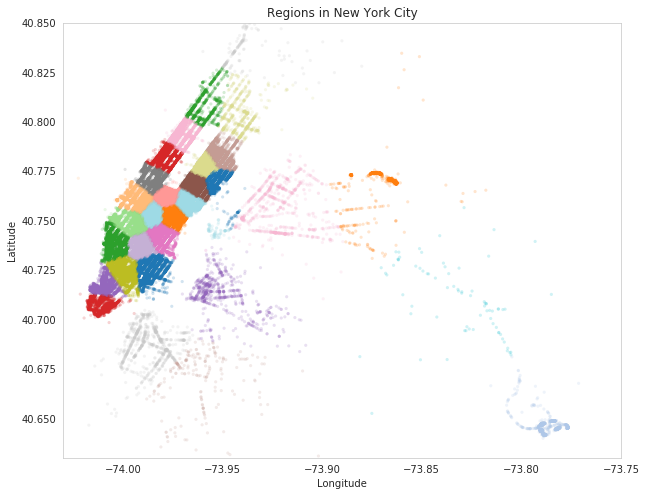

In [57]:
#Visualising the clusters on a map
def plot_clusters(frame):
    city_long_border = (-74.03, -73.75)
    city_lat_border = (40.63, 40.85)
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,8))
    sns.set_style('whitegrid')
    ax.scatter(frame.pickup_longitude.values[:100000],frame.pickup_latitude.values[:100000], s=10, lw=0,\
               c=frame.pickup_cluster.values[:100000], cmap='tab20', alpha=0.2)
    ax.set_xlim(city_long_border)
    ax.set_ylim(city_lat_border)
    plt.title('Regions in New York City')
    
    plt.grid(False)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    plt.show()

plot_clusters(frame_with_durations_outliers_removed)

### [5.2]Time-binning

In [58]:
#Refer:https://www.unixtimestamp.com/
# 1420070400 : 2015-01-01 00:00:00 
# 1422748800 : 2015-02-01 00:00:00 
# 1425168000 : 2015-03-01 00:00:00

# 1451606400 : 2016-01-01 00:00:00 
# 1454284800 : 2016-02-01 00:00:00 
# 1456790400 : 2016-03-01 00:00:00

def add_pickup_bins(frame,month,year):
    unix_pickup_times=[i for i in frame['pickup_times'].values]
    unix_times = [[1420070400,1422748800,1425168000],\
                  [1451606400,1454284800,1456790400]]
    
    start_pickup_unix=unix_times[year-2015][month-1]
    # https://www.timeanddate.com/time/zones/est
    '''(int((i-start_pickup_unix)/600) we take the first pick up as the reference here.\
    since the (int((first_pickup-start_pickup_unix)/600) will result in -33,\
    and we want to make it start from 0. so we add +33 here '''
    # (int((i-start_pickup_unix)/600)+33) : our unix time is in gmt to we are converting it to est
    #first_pickup_bin=(int((i-start_pickup_unix)/600)
    tenminutewise_binned_unix_pickup_times=[(int((i-start_pickup_unix)/600)) for i in unix_pickup_times]
    frame['pickup_bins'] = np.array(tenminutewise_binned_unix_pickup_times)
    return frame

In [59]:
# clustering, making pickup bins and grouping by pickup cluster and pickup bins
frame_with_durations_outliers_removed['pickup_cluster'] = \
kmeans.predict(frame_with_durations_outliers_removed[['pickup_latitude','pickup_longitude']])

jan_2015_frame = add_pickup_bins(frame_with_durations_outliers_removed,1,2015)
jan_2015_groupby = jan_2015_frame[['pickup_cluster','pickup_bins','trip_distance']].groupby(['pickup_cluster',\
                                                                                             'pickup_bins']).count()

In [60]:
# we add two more columns 'pickup_cluster'(to which cluster it belogns to) 
# and 'pickup_bins' (to which 10min intravel the trip belongs to)
'''temporary=jan_2015_frame[jan_2015_frame['pickup_bins']==0]
print(temporary.shape)
print(jan_2015_frame['pickup_bins'].value_counts())'''
jan_2015_frame.head(5)


,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,total_amount,trip_times,pickup_times,Speed,pickup_cluster,pickup_bins
0,1,1.59,-73.993896,40.750111,-73.974785,40.750618,17.05,18.050000,1.421349e+09,5.285319,8,2130
1,1,3.30,-74.001648,40.724243,-73.994415,40.759109,17.80,19.833333,1.420922e+09,9.983193,24,1419
2,1,1.80,-73.963341,40.802788,-73.951820,40.824413,10.80,10.050000,1.420922e+09,10.746269,6,1419
3,1,0.50,-74.009087,40.713818,-74.004326,40.719986,4.80,1.866667,1.420922e+09,16.071429,12,1419
4,1,3.00,-73.971176,40.762428,-74.004181,40.742653,16.30,19.316667,1.420922e+09,9.318378,29,1419


In [61]:
# hear the trip_distance represents the number of pickups that are happend in that
# particular 10min intravel(pickup_bin)
# this data frame has two indices
# primary index: pickup_cluster (cluster number)
# secondary index : pickup_bins (we devid whole months time into 10min intravels 24*31*60/10 =4464bins)
jan_2015_groupby.head(5)

trip_distance
pickup_cluster pickup_bins               
0              0                      191
               1                      381
               2                      403
               3                      374
               4                      400

In [62]:
# upto now we cleaned data and prepared data for the month 2015,

# now do the same operations for months Jan, Feb, March of 2016
# 1. get the dataframe which inlcudes only required colums
# 2. adding trip times, speed, unix time stamp of pickup_time
# 4. remove the outliers based on trip_times, speed, trip_duration, total_amount
# 5. add pickup_cluster to each data point
# 6. add pickup_bin (index of 10min intravel to which that trip belongs to)
# 7. group by data, based on 'pickup_cluster' and 'pickup_bin'

# Data Preparation for the months of Jan,Feb and March 2016
def datapreparation(month,kmeans,month_no,year_no):
    
    print ("Return with trip times..")

    frame_with_durations = return_with_trip_times(month)
    
    print ("Remove outliers..")
    frame_with_durations_outliers_removed = remove_outliers(frame_with_durations)
    
    print ("Estimating clusters..")
    frame_with_durations_outliers_removed['pickup_cluster'] = kmeans.predict(frame_with_durations_outliers_removed[['pickup_latitude', 'pickup_longitude']])
    #frame_with_durations_outliers_removed_2016['pickup_cluster'] = kmeans.predict(frame_with_durations_outliers_removed_2016[['pickup_latitude', 'pickup_longitude']])

    print ("Final groupbying..")
    final_updated_frame = add_pickup_bins(frame_with_durations_outliers_removed,month_no,year_no)
    final_groupby_frame = final_updated_frame[['pickup_cluster','pickup_bins','trip_distance']].groupby(['pickup_cluster','pickup_bins']).count()
    
    return final_updated_frame,final_groupby_frame
    

In [63]:
%%time
month_jan_2016 = dd.read_csv('yellow_tripdata_2016-01.csv')
#month_feb_2016 = dd.read_csv('yellow_tripdata_2016-02.csv')
#month_mar_2016 = dd.read_csv('yellow_tripdata_2016-03.csv')

jan_2016_frame, jan_2016_groupby = datapreparation(month_jan_2016,kmeans,1,2016)
#feb_2016_frame, feb_2016_groupby = datapreparation(month_feb_2016,kmeans,2,2016)
#mar_2016_frame, mar_2016_groupby = datapreparation(month_mar_2016,kmeans,3,2016)

Return with trip times..
Remove outliers..
Number of pickup records =  10906858
Number of outlier coordinates lying outside NY boundaries: 214677
Number of outliers from trip times analysis: 27190
Number of outliers from trip distance analysis: 79742
Number of outliers from speed analysis: 23804
Number of outliers from fare analysis: 4991
Total outliers removed 292418
----------------------------------------------------------------------
Estimating clusters..
Final groupbying..
CPU times: user 7min 22s, sys: 1min 52s, total: 9min 14s
Wall time: 6min 28s


### [5.3]Smoothing

In [64]:
# Gets the unique bins where pickup values are present for each each reigion

# for each cluster region we will collect all the indices of 10min intravels in which the pickups are happened
# we got an observation that there are some pickpbins that doesnt have any pickups
def return_unq_pickup_bins(frame):
    values = []
    for i in range(0,30):
        new = frame[frame['pickup_cluster'] == i]# pick the points belongs to a particular cluster 
        list_unq = list(set(new['pickup_bins']))# list unique time bins present for a particular region / cluster
        list_unq.sort()
        values.append(list_unq)# list contains lists of unique time bin for each cluster in a sorted order
    return values

In [74]:
# for every month we get all indices of 10min intravels in which atleast one pickup
# got happened

# jan
jan_2015_unique = return_unq_pickup_bins(jan_2015_frame)
jan_2016_unique = return_unq_pickup_bins(jan_2016_frame)

# feb
#feb_2016_unique = return_unq_pickup_bins(feb_2016_frame)

# march
#mar_2016_unique = return_unq_pickup_bins(mar_2016_frame)

In [75]:
# for each cluster number of 10min intravels with 0 pickups
# no. of time bins not presented in a region/cluster = totaltime bins - time_bins present in a cluster
for i in range(30):
    #10 mint pin having zero pickup= total 10 mint bins - 10mint bins with pickup
    print("for the ",i,"th cluster number of 10min intavels with zero pickups: ",\
          4464 - len(set(jan_2015_unique[i])))
    print('-'*60)

for the  0 th cluster number of 10min intavels with zero pickups:  31
------------------------------------------------------------
for the  1 th cluster number of 10min intavels with zero pickups:  30
------------------------------------------------------------
for the  2 th cluster number of 10min intavels with zero pickups:  136
------------------------------------------------------------
for the  3 th cluster number of 10min intavels with zero pickups:  30
------------------------------------------------------------
for the  4 th cluster number of 10min intavels with zero pickups:  47
------------------------------------------------------------
for the  5 th cluster number of 10min intavels with zero pickups:  32
------------------------------------------------------------
for the  6 th cluster number of 10min intavels with zero pickups:  39
------------------------------------------------------------
for the  7 th cluster number of 10min intavels with zero pickups:  32
------------

there are two ways to fill up these values
<ul>
<li> Fill the missing value with 0's</li>
<li> Fill the missing values with the avg values
<ul>
<li> Case 1:(values missing at the start)  <br>Ex1: \_ \_ \_ x =>ceil(x/4), ceil(x/4), ceil(x/4), ceil(x/4) <br> Ex2: \_ \_ x => ceil(x/3), ceil(x/3), ceil(x/3) </li>
<li> Case 2:(values missing in middle) <br>Ex1: x \_ \_ y => ceil((x+y)/4), ceil((x+y)/4), ceil((x+y)/4), ceil((x+y)/4) <br> Ex2: x \_ \_ \_ y => ceil((x+y)/5), ceil((x+y)/5), ceil((x+y)/5), ceil((x+y)/5), ceil((x+y)/5) </li>
<li> Case 3:(values missing at the end)  <br>Ex1: x \_ \_ \_  => ceil(x/4), ceil(x/4), ceil(x/4), ceil(x/4) <br> Ex2: x \_  => ceil(x/2), ceil(x/2) </li>
</ul>
</li>
</ul>

### METHOD-1:

In [76]:
# Fills a value of zero for every bin where no pickup data is present 
# the count_values: number pickps that are happened in each region for each 10min intravel
# there wont be any value if there are no pickups.
# values: number of unique bins

# for every 10min intravel(pickup_bin) we will check it is there in our unique bin,
# if it is there we will add the count_values[index] to smoothed data
# if not we add 0 to the smoothed data
# we finally return smoothed data

# values:  list contain list of all the unique pickup_bin in eachh cluster
# ex values = list[[list of uniqe pickup_bin for reg/clu-0],
#                     ,[list of uniqe pickup_bin for reg/clu-1], .... [pic_bin for clus-30]]

# count_values =  #for each region , for each bin, # pickups (i.e. groupby df['trip_dist'])
                  #pickups in each region/cluster for each pickup_bin
def fill_missing(count_values,values):
    smoothed_regions=[]
    ind=0 # track the pickup_bin present in each cluster/reg(actually/already present)
    for r in range(0,30):# select cluster
        smoothed_bins=[]
        for i in range(4464):# select bin(0 to 4464) for that selected cluster
            if i in values[r]:# if sel bin already avalable for sel clust or checks if the pickup-bin exists
                smoothed_bins.append(count_values[ind])
                ind+=1
            else:
                smoothed_bins.append(0)
        smoothed_regions.extend(smoothed_bins)
    return smoothed_regions
# after fill_missing fun our cluster have all the pickup_bins
# if pickup_bin which are previously not there are initialized with 0 after fill_missing

### METHOD-2:

In [77]:
# Fills a value of zero for every bin where no pickup data is present 
# the count_values: number pickps that are happened in each region for each 10min intravel
# there wont be any value if there are no picksups.
# values: number of unique bins

# for every 10min intravel(pickup_bin) we will check it is there in our unique bin,
# if it is there we will add the count_values[index] to smoothed data
# if not we add smoothed data (which is calculated based on the methods that are discussed in the above markdown cell)
# we finally return smoothed data
def smoothing(count_values,values):
    smoothed_regions=[] # stores list of final smoothed values of each reigion/cluster
    ind=0 #track the pickup bin present in each clu/reg(already there)
    repeat=0 
    smoothed_value=0
    for r in range(0,30):# sel cluster
        smoothed_bins=[] #stores the final smoothed values
        repeat=0
        for i in range(4464): #sel bin(0 to 4464) for selected region 
            if repeat!=0: # prevents iteration for a value which is already visited/resolved
                repeat-=1# bcz if first values are empty and after filling it we dont watnt to check 
                continue   # for those
            if i in values[r]: #checks if the pickup-bin exists 
                smoothed_bins.append(count_values[ ind ]) # appends the value of the pickup bin if it exists
            else:# for filling non exist values 
                if i!=0: # enter in if for 2nd and 3 rd case (1st bin is not empty)
                    right_hand_limit=0
                    for j in range(i,4464):#start from ith bin
                        if  j not in values[r]: #searches for the left-limit or the pickup-bin value which has a pickup value
                            continue
                        else:
                            right_hand_limit=j
                            break
                    if right_hand_limit==0:# means last few values are empty
                    #Case 1: When we have the last/last few values are found to be missing,hence we have no right-limit here
                        smoothed_value=count_values[ind-1]*1.0/((4463-i)+2)*1.0                               
                        for j in range(i,4464):                              
                            smoothed_bins.append(math.ceil(smoothed_value))
                        smoothed_bins[i-1] = math.ceil(smoothed_value)
                        repeat=(4463-i)
                        ind-=1
                    else:
                    #Case 2: When we have the missing values between two known values
                        smoothed_value=(count_values[ind-1]+count_values[ind])*1.0/((right_hand_limit-i)+2)*1.0             
                        for j in range(i,right_hand_limit+1):
                            smoothed_bins.append(math.ceil(smoothed_value))
                        smoothed_bins[i-1] = math.ceil(smoothed_value)
                        repeat=(right_hand_limit-i)
                else:# if 1st bin is not present
                    #Case 3: When we have the first/first few values are found to be missing,hence we have no left-limit here
                    right_hand_limit=0
                    for j in range(i,4464):
                        if  j not in values[r]:
                            continue
                        else:
                            right_hand_limit=j
                            break
                    smoothed_value=count_values[ind]*1.0/((right_hand_limit-i)+1)*1.0
                    for j in range(i,right_hand_limit+1):
                            smoothed_bins.append(math.ceil(smoothed_value))
                    repeat=(right_hand_limit-i)
            ind+=1
        smoothed_regions.extend(smoothed_bins)
    return smoothed_regions


In [86]:
#Filling Missing values of Jan-2015 with 0
# here in jan_2015_groupby dataframe the trip_distance represents the number of pickups that are happened
jan_2015_fill = fill_missing(jan_2015_groupby['trip_distance'].values,jan_2015_unique)

#Smoothing Missing values of Jan-2015
jan_2015_smooth = smoothing(jan_2015_groupby['trip_distance'].values,jan_2015_unique)


In [87]:
# number of 10min indices for jan 2015= 24*31*60/10 = 4464
# number of 10min indices for jan 2016 = 24*31*60/10 = 4464
# number of 10min indices for feb 2016 = 24*29*60/10 = 4176
# number of 10min indices for march 2016 = 24*30*60/10 = 4320
# for each cluster we will have 4464 values, therefore 40*4464 = 178560 (length of the jan_2015_fill)
print("number of 10min intravels among all the clusters ",len(jan_2015_fill))

number of 10min intravels among all the clusters  133920


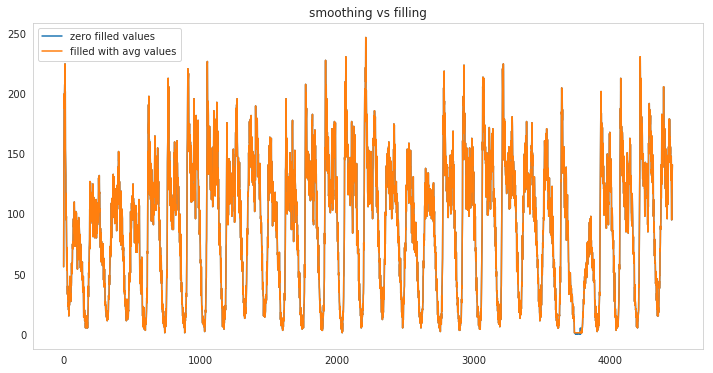

In [89]:
# Smoothing vs Filling
# sample plot that shows two variations of filling missing values
# we have taken the number of pickups for cluster region 2
plt.figure(figsize=(12,6))
plt.grid(False)
#sns.set_style('whitegrid')
plt.title('smoothing vs filling')
plt.plot(jan_2015_fill[4464:8920],label="zero filled values")
plt.plot(jan_2015_smooth[4464:8920], label="filled with avg values")
plt.legend()
plt.show()

### [Q] why we choose, these methods and which method is used for which data?

### Ans:
consider we have data of some month in 2015 jan 1st, 10 _ _ _ 20, i.e there are 10 pickups that are happened in 1st 10st 10min intravel, 0 pickups happened in 2nd 10mins intravel, 0 pickups happened in 3rd 10min intravel and 20 pickups happened in 4th 10min intravel.

In fill_missing method we replace these values like 10, 0, 0, 20

where as in smoothing method we replace these values as 6,6,6,6,6, if you can check the number of pickups that are happened in the first 40min are same in both cases, but if you can observe that we looking at the future values 

when you are using smoothing we are looking at the future number of pickups which might cause a data leakage.
so we use smoothing for jan 2015th data since it acts as our training data and we use simple fill_misssing method for 2016th data.

In [90]:
# Jan-2015 data is smoothed, Jan,Feb & March 2016 data missing values are filled with zero
jan_2015_smooth = smoothing(jan_2015_groupby['trip_distance'].values,jan_2015_unique)
jan_2016_smooth = fill_missing(jan_2016_groupby['trip_distance'].values,jan_2016_unique)
#feb_2016_smooth = fill_missing(feb_2016_groupby['trip_distance'].values,feb_2016_unique)
#mar_2016_smooth = fill_missing(mar_2016_groupby['trip_distance'].values,mar_2016_unique)

# Making list of all the values of pickup data in every bin for a period of 3 months and storing them region-wise 
regions_cum = []

# a =[1,2,3]
# b = [2,3,4]
# a+b = [1, 2, 3, 2, 3, 4]

# number of 10min indices for jan 2015= 24*31*60/10 = 4464
# number of 10min indices for jan 2016 = 24*31*60/10 = 4464
# number of 10min indices for feb 2016 = 24*29*60/10 = 4176
# number of 10min indices for march 2016 = 24*31*60/10 = 4464
# regions_cum: it will contain 40 lists, each list will contain 4464+4176+4464 values
# which represents the number of pickups that are happened for three months in 2016 data

for i in range(0,30):
    regions_cum.append(jan_2016_smooth[4464*i:4464*(i+1)])#+feb_2016_smooth[4176*i:4176*(i+1)]+mar_2016_smooth[4464*i:4464*(i+1)])

# print(len(regions_cum))
# 40
# print(len(regions_cum[0]))
# 13104

In [91]:
print(len(regions_cum))
# 40
print(len(regions_cum[0]))
# 13104


30
4464


In [92]:
savetofile(jan_2015_smooth, 'jan_2015_smooth')
savetofile(jan_2016_smooth, 'jan_2016_smooth')
savetofile(regions_cum, 'regions_cum')
savetofile(kmeans, 'kmeans')

# Assignments

        

Task 1: Incorporate Fourier features as features into Regression models and measure MAPE.

Task 2: Perform hyper-parameter tuning for Regression models.
        2a. Linear Regression: Grid Search
        2b. Random Forest: Random Search 
        2c. Xgboost: Random Search

Task 3: Explore more time-series features using Google search/Quora/Stackoverflow
to reduce the MAPE to < 12%